In [2]:
import pandas as pd
import numpy as np
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt

In [3]:
df_bmi = pd.read_csv('thesis__data_res.csv', usecols = ['YEAR', 'BMICALC', 'AGE'])

In [4]:
# remove ppl who did not ansew this question
df_bmi = df_bmi[(df_bmi['BMICALC'] < 900) & (df_bmi['BMICALC'] != 0.0)]

years = list(range(1976, 2024))
means, p25, p75, p10, p90 = [], [], [], [], []

# calculate statistics for each year
for y in years:
    df_bmi_i = df_bmi[df_bmi['YEAR'] == y]
    means.append(df_bmi_i['BMICALC'].mean())
    p25.append(df_bmi_i['BMICALC'].quantile(0.25))
    p75.append(df_bmi_i['BMICALC'].quantile(0.75))
    p10.append(df_bmi_i['BMICALC'].quantile(0.10))
    p90.append(df_bmi_i['BMICALC'].quantile(0.90))

In [5]:
# consider only samples wiht BMICALC \in (15, 50)
df_bmi_res = df_bmi[(df_bmi['BMICALC'] < 50) & (df_bmi['BMICALC'] > 15)]
df_bmi_res = df_bmi_res.copy()

# define age groups
age_bins = [20, 30, 40, 50, 60, 70, 80]
age_labels = ['20-30', '30-40', '40-50', '50-60', '60-70', '70-80']

# assign age groups to a new column
df_bmi_res['AGE_GROUP'] = pd.cut(df_bmi_res['AGE'], bins=age_bins, labels=age_labels, right=False)

# drop rows with missing age group information
df_bmi_res = df_bmi_res.dropna(subset=['AGE_GROUP'])

In [6]:
# plot

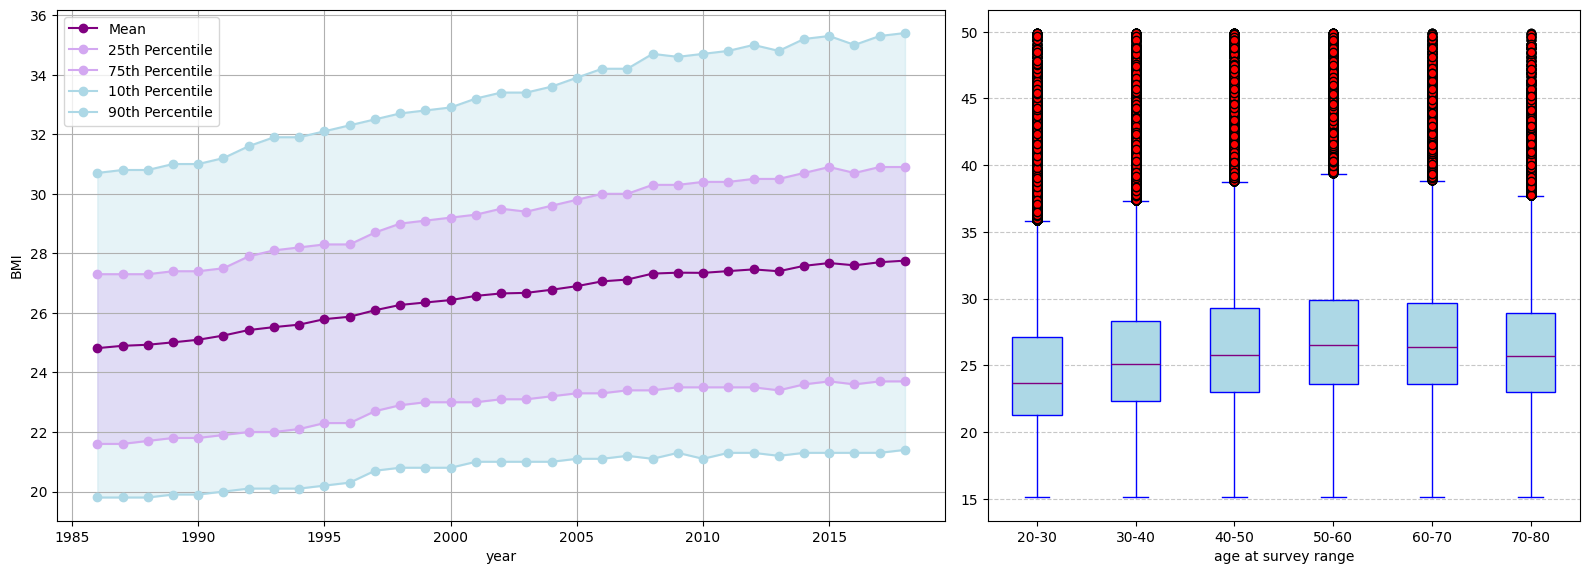

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'width_ratios': [3, 2]})

# plot 1: BMI percentiles over years
ax1 = axes[0]
ax1.plot(years, means, label='Mean', marker='o', color='purple')
ax1.plot(years, p25, label='25th Percentile', marker='o', color='#D3A8F1')
ax1.plot(years, p75, label='75th Percentile', marker='o', color='#D3A8F1')
ax1.plot(years, p10, label='10th Percentile', marker='o', color='lightblue')
ax1.plot(years, p90, label='90th Percentile', marker='o', color='lightblue')
ax1.fill_between(years, p10, p90, color='lightblue', alpha=0.3)
ax1.fill_between(years, p25, p75, color='#D3A8F1', alpha=0.3)
ax1.set_xlabel('year')
ax1.set_ylabel('BMI')
ax1.legend()
ax1.grid(True)

# plot 2: BMI boxplot by age groups
ax2 = axes[1]
df_bmi_res.boxplot(
    column='BMICALC',
    by='AGE_GROUP',
    ax=ax2,
    grid=False,
    patch_artist=True,
    boxprops=dict(facecolor='lightblue', color='blue'),
    medianprops=dict(color='purple'),
    flierprops=dict(markerfacecolor='red', marker='o'),
    whiskerprops=dict(color='blue'),
    capprops=dict(color='blue'))
ax2.set_title('')
ax2.set_xlabel('age at survey range')
ax2.grid(axis='y', linestyle='--', alpha=0.7)

# remove the shared title
fig.suptitle('')

plt.tight_layout()
plt.savefig('bmi_comparison_plots.png', format='png')
plt.show()